# Problem 7

Importing  required libraries:

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns

from PIL import Image
from skimage import img_as_float
from skimage.io import imsave
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Determine list of possible values for rank k

In [68]:
k_list = [1, 2, 5, 10, 20, 50]

Performing SVD and beest k-rank approximation for grayscale image of myself. 

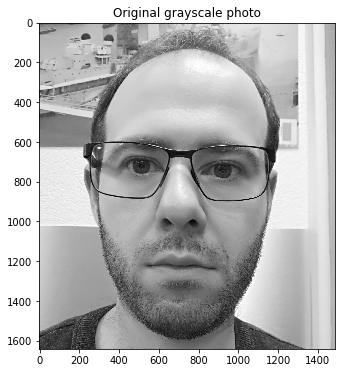

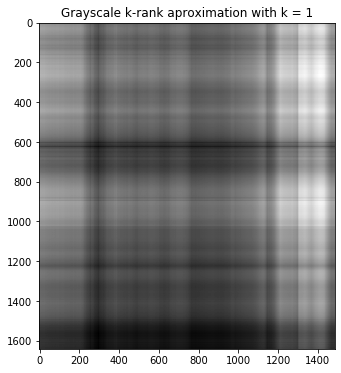

Frobenius distance with original image is 66936.9169


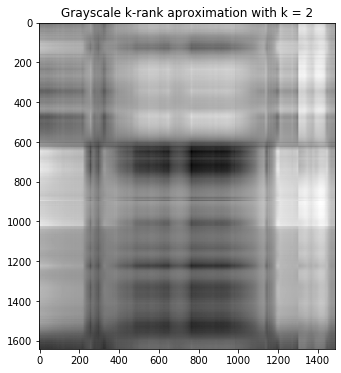

Frobenius distance with original image is 54805.9659


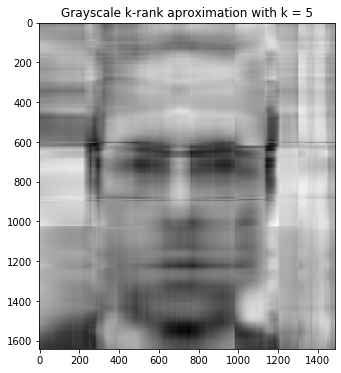

Frobenius distance with original image is 38587.5053


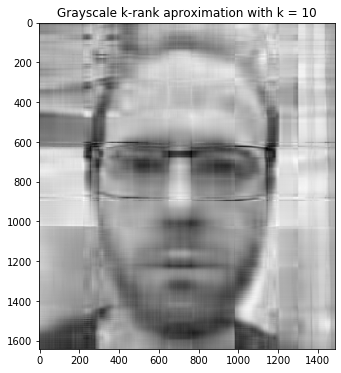

Frobenius distance with original image is 28511.0002


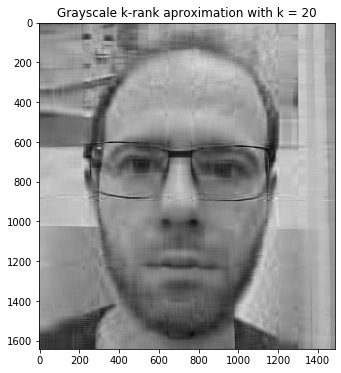

Frobenius distance with original image is 20072.1744


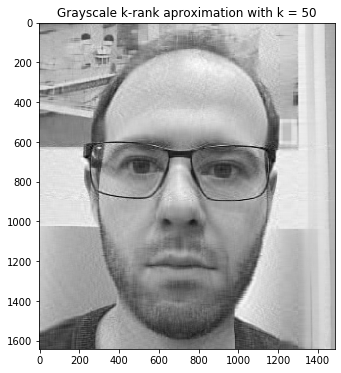

Frobenius distance with original image is 12689.9064


In [69]:
myphoto = Image.open('myphoto_cropped.jpg') #load image
myphotogray = myphoto.convert('LA') #convert it to grayscale
plt.figure(figsize=(9, 6)) #plot original grayscales image for comparison
plt.title("Original grayscale photo")
plt.imshow(myphotogray);
plt.show()

photo_matrix = np.array(list(myphotogray.getdata(band=0)), float) #converting photo to matrix 
photo_matrix.shape = (myphotogray.size[1], myphotogray.size[0])
photo_matrix = np.matrix(photo_matrix)

U, sigma, V = np.linalg.svd(photo_matrix) #performing SVD

for k in k_list:#for each k reconstruct image and plot it
    svd_photo = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :]) #image reconstruction takin k first elements
#     if k == 1:
#         imsave('g1.jpg',svd_photo)
#     if k == 50:
#         imsave('g50.jpg',svd_photo)
    plt.figure(figsize=(9, 6))
    plt.imshow(svd_photo, cmap='gray')
    plt.title("Grayscale k-rank aproximation with k = %s" %k)
    plt.show()
    frob_norm = np.linalg.norm(photo_matrix - svd_photo,'fro') #calculating Frobenius norm over 1D array representing 
    #original image and reconstructed one
    print('Frobenius distance with original image is %.4f' %frob_norm)

Doing same for colored photo:

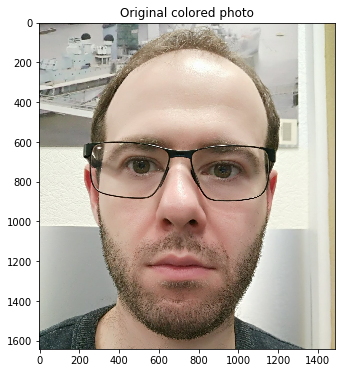

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


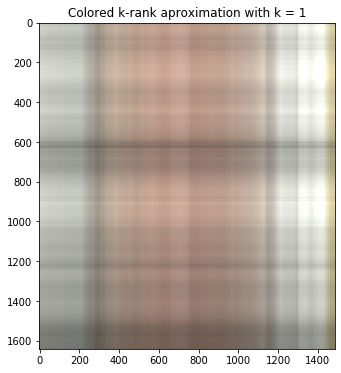

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frobenius distance with original image is 461.0927


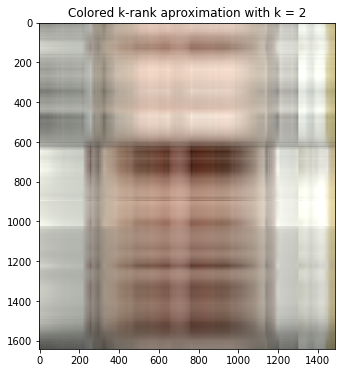

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frobenius distance with original image is 380.1295


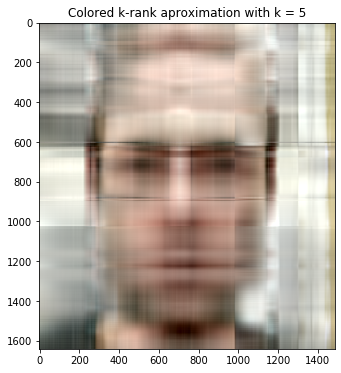

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frobenius distance with original image is 269.6812


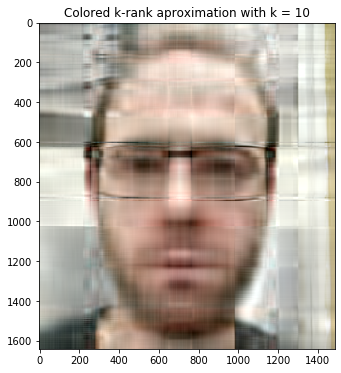

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frobenius distance with original image is 199.6591


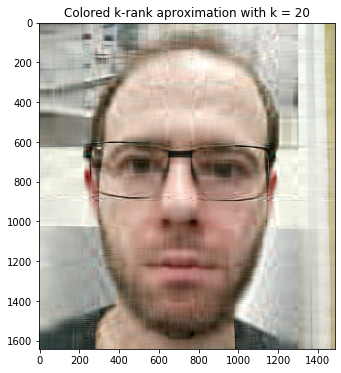

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Frobenius distance with original image is 140.4345


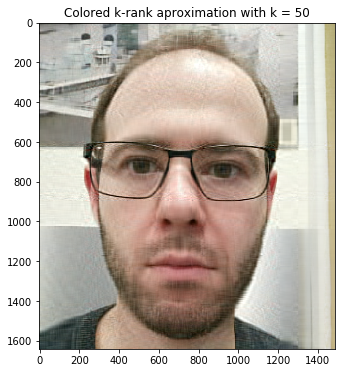

Frobenius distance with original image is 88.9034


In [70]:
color_photo = img_as_float(Image.open('myphoto_cropped.jpg')) #load image and represent it as array
plt.figure(figsize=(9, 6)) #plot original photo in color
plt.title("Original colored photo")
plt.imshow(color_photo);
plt.show()

shape = color_photo.shape #keep shape of original photo to be used later
photo_reshaped = color_photo.reshape((shape[0],shape[1]*3)) #reshape photo into 2D array instead of 3D
U,sigma,V = np.linalg.svd(photo_reshaped,full_matrices=False) #performing SVD

for k in k_list: #looping over possible k values
    svd_photo = np.dot(U[:,:k],np.dot(np.diag(sigma[:k]),V[:k,:])) #reconstructing k-rank approximation of image
    svd_photo_resh = svd_photo.reshape(shape) #setting back original shape
    plt.figure(figsize=(9, 6)) #plot k-rank approximation of photo
    plt.title("Colored k-rank aproximation with k = %s" %k)
    plt.imshow(svd_photo_resh)
#     if k == 1:
#         imsave('1.jpg',svd_photo_resh)
#     if k == 50:
#         imsave('50.jpg',svd_photo_resh)
    plt.show()
    frob_norm = np.linalg.norm(photo_reshaped - svd_photo,'fro') #calculating frobenius norm for 2D array representing 
    #original abd recostructed photos
    print('Frobenius distance with original image is %.4f' %frob_norm)

# Problem 14

## Task (a)
Generating requested sample from two-dimensional Gaussian normal distrobution

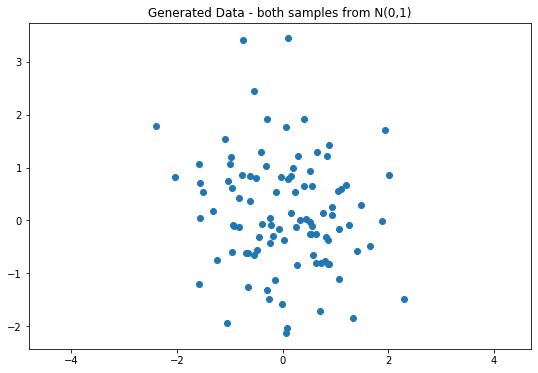

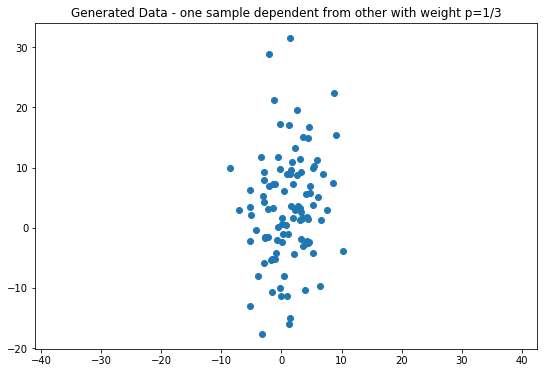

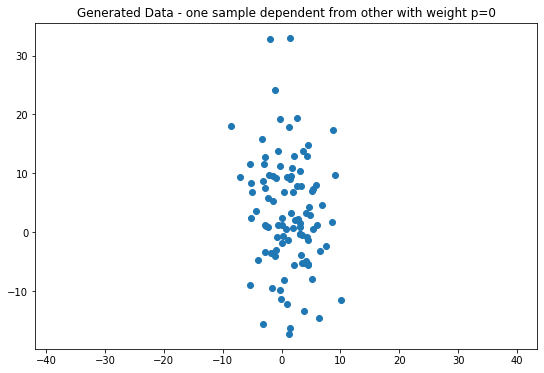

In [71]:
mu1, mu2, sigma1, sigma2, n, p = 1, 2, 4, 9, 100, 1/3 #setting required variables

Z1=np.random.normal(0, 1, n)#generating two samples of size 100 from normal distribution
Z2=np.random.normal(0, 1, n)

Z_n=np.column_stack((Z1, Z2)) #merging two samples
plt.figure(figsize=(9, 6))
plt.scatter(Z_n[:, 0], Z_n[:, 1]) #Visualizing two sampels
plt.title('Generated Data - both samples from N(0,1)')
plt.axis('equal')
plt.show()

X=mu1+sigma1*Z1 #now creating two sampls with dependency from each other given by p=1/3
Y=mu2+sigma2*p*Z1+np.sqrt(1-np.power(p, 2))*sigma2*Z2

N=np.column_stack((X, Y))#merging two samples

plt.figure(figsize=(9, 6)) #Visualizing to samples on scatterplot
plt.scatter(N[:, 0], N[:, 1])
plt.title('Generated Data - one sample dependent from other with weight p=1/3')
plt.axis('equal')
plt.show()

p=0
X0=mu1+sigma1*Z1 #now creating two sampls with dependency from each other given by p=0
Y0=mu2+sigma2*p*Z1+np.sqrt(1-np.power(p, 2))*sigma2*Z2

N0=np.column_stack((X0, Y0))#merging two samples

plt.figure(figsize=(9, 6)) #Visualizing to samples on scatterplot
plt.scatter(N0[:, 0], N0[:, 1])
plt.title('Generated Data - one sample dependent from other with weight p=0')
plt.axis('equal')
plt.show()

## Task (b)
Now calculating empirical covariance matrix for P=1/3 and p=0. Also calculating theoretical covariance matrix as well. Next, we will find eigenvalues and eigenvectors of covariance matrix C for p=1/3.

In [72]:
C_emp=np.cov(N.T) #Calculating empirical covariance matrix for p=1/3
print("Empirical covariance matrix for p=1/3: \n",C_emp)
print("\n")

C_emp0=np.cov(N0.T) #Calculating empirical covariance matrix for p=0
print("Empirical covariance matrix for p=0: \n", C_emp0)
print("\n")

C_theor = np.array([[sigma1**2, 0], [0, sigma2**2]])
print("Theoretical covariance matrix for p=1/3: \n", C_theor)
print("\n")

lambdas, EVcs = np.linalg.eig(C_emp)#finding eigenvalues and eigenvectors of empirical covariance matrix C_emp
print("Eigenvectors of empirical matrix C_emp: \n", lambdas)
print("\n")
print("Eigenvectors of empirical matrix C_emp: \n", EVcs)



Empirical covariance matrix for p=1/3: 
 [[13.96017948  5.32455114]
 [ 5.32455114 82.87386138]]


Empirical covariance matrix for p=0: 
 [[13.96017948 -5.45771545]
 [-5.45771545 93.08209009]]


Theoretical covariance matrix for p=1/3: 
 [[16  0]
 [ 0 81]]


Eigenvectors of empirical matrix C_emp: 
 [13.55121005 83.28283081]


Eigenvectors of empirical matrix C_emp: 
 [[-0.99706323 -0.07658268]
 [ 0.07658268 -0.99706323]]


## Task (c)
Going forward, compute PCA on generated sample. afterwards, calculate variance on fiirst principal component and calculate which fraction of total variance its include. All calculations done for p=1/3.

In [73]:
N_n = StandardScaler().fit_transform(N) # Standardizing data befor PCA

pca = PCA(n_components=2) #executing PCA for both components
principalComponents = pca.fit_transform(N_n)

print("Variance from PCA for both components \n", pca.explained_variance_)
print("\n")

print("Fraction of total variance from PCA in % \n", pca.explained_variance_ratio_)
print("\n")

var = np.var(principalComponents, axis=0)#doing same calculation manually for cross check
print("Variance of first component caclulated manually %.8f \n" %var[0])
print("Fraction of total variance for first component calculated manually %.8f" %(var[0]/(var[0]+var[1])))

Variance from PCA for both components 
 [1.16822345 0.85197857]


Fraction of total variance from PCA in % 
 [0.57827061 0.42172939]


Variance of first component caclulated manually 1.15654122 

Fraction of total variance for first component calculated manually 0.57827061


## Task (d)
Parameter p determines level of dependency between two samples. As result with higher values of p fraction of first component will increase up to 100% for p=1.
To prove it numerically I will re-do same actions for p=2/3 and p=1

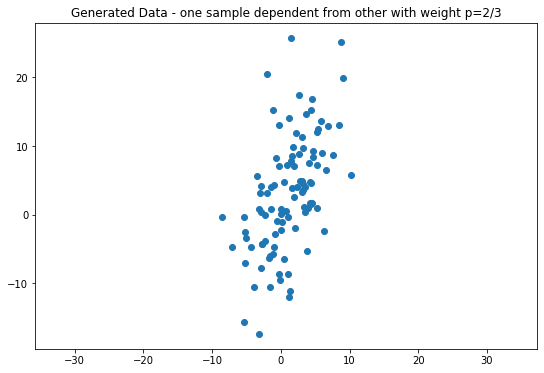

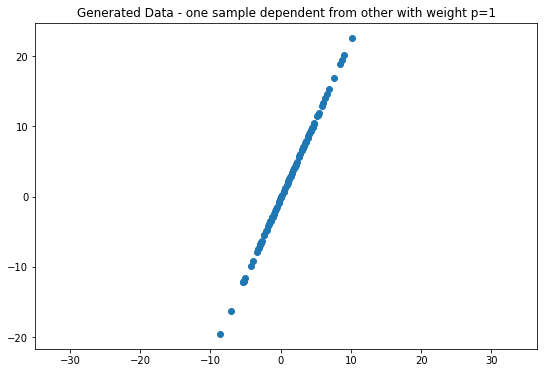

Empirical covariance matrix for p=2/3: 
 [[13.96017948 16.8723283 ]
 [16.8723283  70.91885335]]


Empirical covariance matrix for p=1: 
 [[13.96017948 31.41040383]
 [31.41040383 70.67340861]]


For p=2/3:
Variance from PCA for both components 
 [1.55174443 0.46845759]


Fraction of total variance from PCA in % 
 [0.76811349 0.23188651]


Variance of first component caclulated manually 1.53622698 

Fraction of total variance for first component calculated manually 0.76811349


For p=1:
Variance from PCA for both components 
 [2.02020202e+00 3.11453826e-32]


Fraction of total variance from PCA in % 
 [1.00000000e+00 1.54169644e-32]


Variance of first component caclulated manually 2.00000000 

Fraction of total variance for first component calculated manually 1.00000000


In [74]:
p_2, p_3 = 2/3, 1 #setting required variables

X_2=mu1+sigma1*Z1 #now creating two sampls with dependency from each other given by p=1/3
Y_2=mu2+sigma2*p_2*Z1+np.sqrt(1-np.power(p_2, 2))*sigma2*Z2
X_3=mu1+sigma1*Z1
Y_3=mu2+sigma2*p_3*Z1+np.sqrt(1-np.power(p_3, 2))*sigma2*Z2

N_2=np.column_stack((X_2, Y_2))#merging two samples
N_3=np.column_stack((X_3, Y_3))

plt.figure(figsize=(9, 6)) #Visualizing to samples on scatterplot
plt.scatter(N_2[:, 0], N_2[:, 1])
plt.title('Generated Data - one sample dependent from other with weight p=2/3')
plt.axis('equal')
plt.show()

plt.figure(figsize=(9, 6))
plt.scatter(N_3[:, 0], N_3[:, 1])
plt.title('Generated Data - one sample dependent from other with weight p=1')
plt.axis('equal')
plt.show()

C_emp_2=np.cov(N_2.T) #Calculating empirical covariance matrix for p=2/3
print("Empirical covariance matrix for p=2/3: \n",C_emp_2)
print("\n")

C_emp_3=np.cov(N_3.T) #Calculating empirical covariance matrix for p=1
print("Empirical covariance matrix for p=1: \n",C_emp_3)
print("\n")

N_n_2 = StandardScaler().fit_transform(N_2) # Standardizing data befor PCA
N_n_3 = StandardScaler().fit_transform(N_3)

print("For p=2/3:")
pca = PCA(n_components=2) #executing PCA for both components
principalComponents_2 = pca.fit_transform(N_n_2)

print("Variance from PCA for both components \n", pca.explained_variance_)
print("\n")

print("Fraction of total variance from PCA in % \n", pca.explained_variance_ratio_)
print("\n")

var = np.var(principalComponents_2, axis=0)#doing same calculation manually for cross check
print("Variance of first component caclulated manually %.8f \n" %var[0])
print("Fraction of total variance for first component calculated manually %.8f" %(var[0]/(var[0]+var[1])))
print("\n")

print("For p=1:")
principalComponents_3 = pca.fit_transform(N_n_3)

print("Variance from PCA for both components \n", pca.explained_variance_)
print("\n")

print("Fraction of total variance from PCA in % \n", pca.explained_variance_ratio_)
print("\n")

var = np.var(principalComponents_3, axis=0)#doing same calculation manually for cross check
print("Variance of first component caclulated manually %.8f \n" %var[0])
print("Fraction of total variance for first component calculated manually %.8f" %(var[0]/(var[0]+var[1])))